## TF tunner samples

In [1]:
from processing import load_image_dataset

x_lbp_train, y_lbp_train = load_image_dataset('Datasets/espe/lbp_histograms - copia/train', (40, 40), True)
x_lbp_test, y_lbp_test = load_image_dataset('Datasets/espe/lbp_histograms - copia/test', (40, 40), True)
x_lbp_validation, y_lbp_validation = load_image_dataset('Datasets/espe/lbp_histograms - copia/validation', (40, 40), True)

x_masks_train, y_masks_train = load_image_dataset('Datasets/espe/masks/train', (40, 40), True)
x_masks_test, y_masks_test = load_image_dataset('Datasets/espe/masks/test', (40, 40), True)
x_masks_validation, y_masks_validation = load_image_dataset('Datasets/espe/masks/validation', (40, 40), True)

Using TensorFlow backend.


In [2]:
print("x train rgb shape: {} \t x train masks shape: {} \t same?: {}".format(x_lbp_train.shape, x_masks_train.shape, x_lbp_train.shape==x_masks_train.shape ))
print("x test rgb shape: {} \t x test masks shape: {}  \t same?: {}".format(x_lbp_test.shape, x_masks_test.shape, x_lbp_test.shape==x_masks_test.shape))
print("x validation rgb shape: {} \t x validation masks shape: {} \t same?: {}".format(x_lbp_validation.shape, x_masks_validation.shape, x_lbp_validation.shape==x_masks_validation.shape))

x train rgb shape: (10507, 40, 40, 1) 	 x train masks shape: (10507, 40, 40, 1) 	 same?: True
x test rgb shape: (2261, 40, 40, 1) 	 x test masks shape: (2261, 40, 40, 1)  	 same?: True
x validation rgb shape: (2527, 40, 40, 1) 	 x validation masks shape: (2527, 40, 40, 1) 	 same?: True


In [3]:
import numpy as np
x_masks, y_masks = np.concatenate((x_masks_train/255, x_masks_validation/255), axis=0), np.concatenate((y_masks_train, y_masks_validation), axis=0)
# concatenation with normalization
x_lbp, y_lbp = np.concatenate((x_lbp_train/255, x_lbp_validation/255), axis=0), np.concatenate((y_lbp_train, y_lbp_validation), axis=0)

In [4]:
x_masks.shape, x_lbp.shape

((13034, 40, 40, 1), (13034, 40, 40, 1))

# First work models training

### Training LBP identification model

In [19]:
from utils.Models import *
from training.utils import cv_training
from tensorflow.keras.utils import plot_model

loss_function = tf.keras.losses.CategoricalCrossentropy()
model = None
model = individual_feature_model((40, 40, 1))

cv_training(model=model, n_splits=4, x_data=[x_lbp], y_data=y_lbp, path_to_save_results='models/own/experiments/lbp_model/experiment_2', batch_size=300, epochs=10)

Train on 7820 samples, validate on 1955 samples
Epoch 1/10
7820/7820 [==============================] - 2s 257us/sample - loss: 1.9478 - acc: 0.1446 - val_loss: 1.9517 - val_acc: 0.1806
Epoch 2/10
7820/7820 [==============================] - 1s 124us/sample - loss: 1.9167 - acc: 0.2402 - val_loss: 2.0683 - val_acc: 0.1678
Epoch 3/10
7820/7820 [==============================] - 1s 123us/sample - loss: 1.6532 - acc: 0.3725 - val_loss: 1.8965 - val_acc: 0.2445
Epoch 4/10
7820/7820 [==============================] - 1s 134us/sample - loss: 1.3474 - acc: 0.5008 - val_loss: 1.7612 - val_acc: 0.3698
Epoch 5/10
7820/7820 [==============================] - 1s 123us/sample - loss: 1.0872 - acc: 0.6183 - val_loss: 1.5735 - val_acc: 0.4286
Epoch 6/10
7820/7820 [==============================] - 1s 123us/sample - loss: 0.9045 - acc: 0.6730 - val_loss: 1.6018 - val_acc: 0.4440
Epoch 7/10
7820/7820 [==============================] - 1s 125us/sample - loss: 0.7255 - acc: 0.7481 - val_loss: 2.0530 - va

<Figure size 432x288 with 0 Axes>

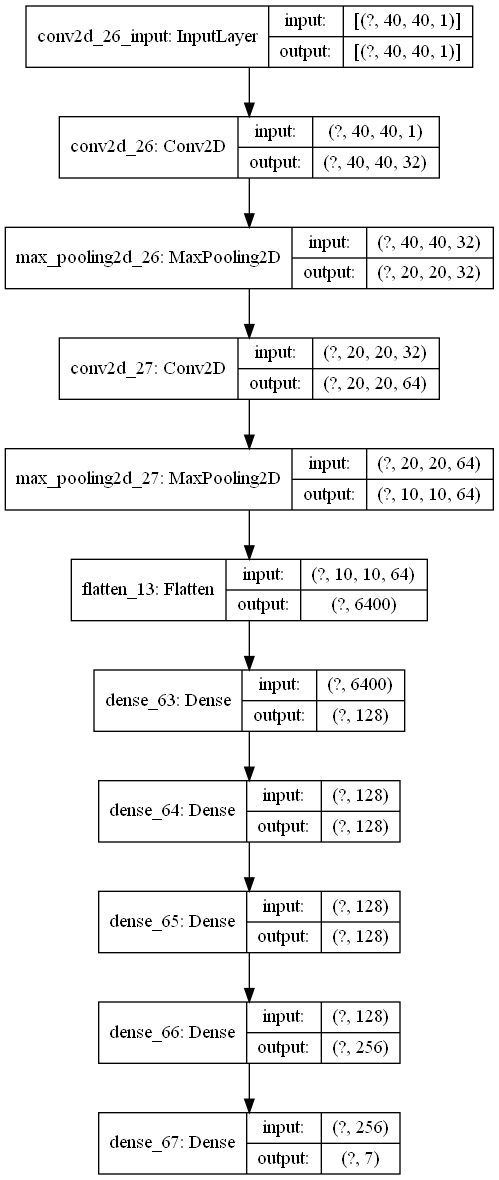

In [28]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [39]:
# evaluating model
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
model = load_model('models/own/experiments/lbp_model/experiment_1/model_3.h5')
model.evaluate(x_lbp_test/255, y_lbp_test)

2261/2261 [==============================] - 10s 4ms/sample - loss: 1.6914 - acc: 0.6249


[1.6914048140579385, 0.6249447]

In [59]:
print(x_lbp_test[10, 0, 0, 0])
print(x_lbp_test[10, 20, 20, 0])

24
21


### Training masks identification model

In [31]:
from utils.Models import *
from training.utils import cv_training

loss_function = tf.keras.losses.CategoricalCrossentropy()

input_shape = x_masks.shape[1:]
model = None
model = individual_feature_model(input_shape)

cv_training(model=model, n_splits=3, x_data=[x_masks], y_data=y_masks, path_to_save_results='models/own/experiments/sillhouette_model/experiment_2', batch_size=200, epochs=10)

Train on 6951 samples, validate on 1738 samples
Epoch 1/10
6951/6951 [==============================] - 10s 1ms/sample - loss: 1.9286 - acc: 0.1831 - val_loss: 2.0733 - val_acc: 0.1784
Epoch 2/10
6951/6951 [==============================] - 1s 171us/sample - loss: 1.6347 - acc: 0.3897 - val_loss: 1.9731 - val_acc: 0.2900
Epoch 3/10
6951/6951 [==============================] - 1s 164us/sample - loss: 1.1981 - acc: 0.5700 - val_loss: 1.9095 - val_acc: 0.3211
Epoch 4/10
6951/6951 [==============================] - 1s 170us/sample - loss: 0.9409 - acc: 0.6704 - val_loss: 2.0513 - val_acc: 0.3590
Epoch 5/10
6951/6951 [==============================] - 1s 166us/sample - loss: 0.7470 - acc: 0.7372 - val_loss: 2.1684 - val_acc: 0.4022
Epoch 6/10
6951/6951 [==============================] - 1s 155us/sample - loss: 0.5663 - acc: 0.8030 - val_loss: 1.9951 - val_acc: 0.4384
Epoch 7/10
6951/6951 [==============================] - 1s 160us/sample - loss: 0.4510 - acc: 0.8452 - val_loss: 2.0011 - val

<Figure size 432x288 with 0 Axes>

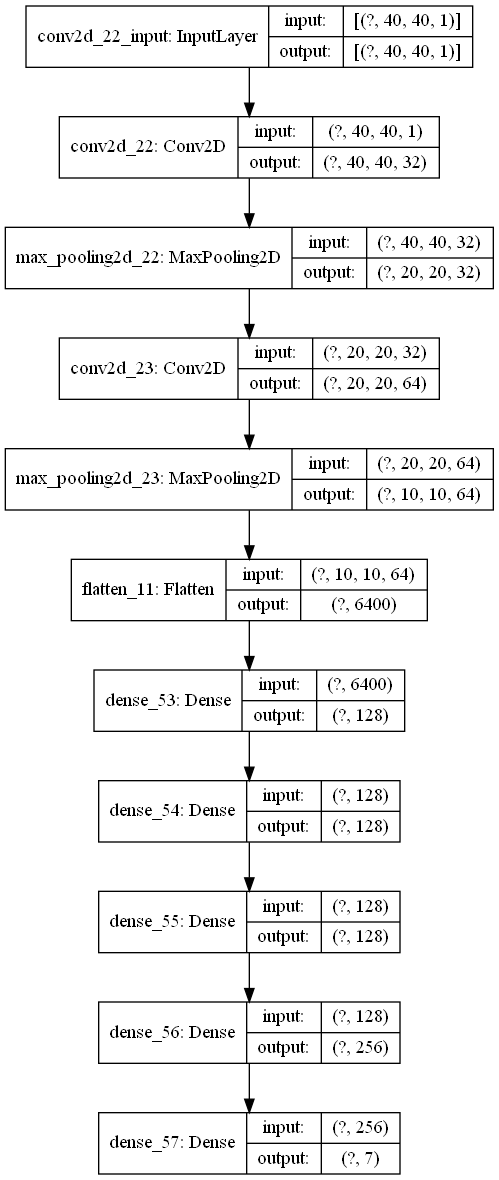

In [23]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [36]:
# evaluating model
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
model = load_model('models/own/experiments/sillhouette_model/experiment_2/model_1.h5')
model.evaluate(x_masks_test, y_masks_test)

2261/2261 [==============================] - 1s 468us/sample - loss: 664.7397 - acc: 0.4299


[664.739747424191, 0.42989826]

In [37]:
# evaluating model
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
model = load_model('models/own/experiments/sillhouette_model/experiment_2/model_2.h5')
model.evaluate(x_masks_test, y_masks_test)

2261/2261 [==============================] - 1s 466us/sample - loss: 747.4525 - acc: 0.4454


[747.4524620871057, 0.44537815]

In [38]:
# evaluating model
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
model = load_model('models/own/experiments/sillhouette_model/experiment_2/model_3.h5')
model.evaluate(x_masks_test, y_masks_test)

2261/2261 [==============================] - 1s 474us/sample - loss: 955.0543 - acc: 0.4878


[955.0543488169708, 0.48783726]

### Training double input images with siamese model

In [19]:
from utils.Models import *
from training.utils import cv_training

loss_function = tf.keras.losses.CategoricalCrossentropy()

model = None
model = prototype_model_for_reid((40, 40, 1))

cv_training(model=model, n_splits=3, x_data=[x_masks, x_lbp], y_data=y_lbp, path_to_save_results='models/own/experiments/double_branch_model/experiment_5', batch_size=32, epochs=30)

Train on 6951 samples, validate on 1738 samples
Epoch 1/30
6951/6951 [==============================] - 5s 663us/sample - loss: 1.9289 - acc: 0.1946 - val_loss: 1.9356 - val_acc: 0.1577
Epoch 2/30
6951/6951 [==============================] - 3s 490us/sample - loss: 1.8386 - acc: 0.3719 - val_loss: 1.8885 - val_acc: 0.2560
Epoch 3/30
6951/6951 [==============================] - 3s 492us/sample - loss: 1.6735 - acc: 0.5684 - val_loss: 1.7882 - val_acc: 0.3671
Epoch 4/30
6951/6951 [==============================] - 3s 497us/sample - loss: 1.4905 - acc: 0.6580 - val_loss: 1.7461 - val_acc: 0.3723
Epoch 5/30
6951/6951 [==============================] - 3s 490us/sample - loss: 1.2973 - acc: 0.7534 - val_loss: 1.5803 - val_acc: 0.5000
Epoch 6/30
6951/6951 [==============================] - 3s 489us/sample - loss: 1.1204 - acc: 0.8333 - val_loss: 1.5557 - val_acc: 0.5035
Epoch 7/30
6951/6951 [==============================] - 3s 490us/sample - loss: 0.9414 - acc: 0.8640 - val_loss: 1.9550 - va

<Figure size 432x288 with 0 Axes>

In [18]:
# evaluating model
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
model = load_model('models/own/experiments/double_branch_model/experiment_1/sample_model3.h5')
model.evaluate([x_lbp_test/255, x_masks_test/255], y_masks_test)

2261/2261 [==============================] - 1s 282us/sample - loss: 3.0531 - acc: 0.5064


[3.0531020437073573, 0.5064131]